In [203]:
#open csv file in dataframe

import pandas as pd
import nltk
import spacy
import gensim
import textblob
from nltk.stem import WordNetLemmatizer
#from textblob import Word, TextBlob
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('vader_lexicon', quiet=True)

df = pd.read_csv(r"/Users/junyuan/Downloads/fake reviews dataset.csv")
pd.set_option("max_colwidth",None)
df

[nltk_data] Downloading package punkt to /Users/junyuan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junyuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/junyuan/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/junyuan/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/junyuan/nltk_data...
[nltk_data]   Package words is already up-to-date!


,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfortable. I love it!Very pretty"
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I've had mine for a couple of years"
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and feel of this pillow.
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it is a great product for the price! I"
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the set for two months now and have not been
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,"I had read some reviews saying that this bra ran small and so I ordered TWO band AND cup sizes UP and it was still too small! Definitely along the lines of a sports bra squish effect. The sides do come up high. Glamorise is one the best brands for bras, so I'm very surprised with this one. The front close idea appealed to me, but look carefully, there are 7 (yes, seven) clasps to do up. What a pain. I think if I had ordered 3 sizes up it might be ok. I won't return it as I'm losing weight, so it might fit better down the road. Will update review at that time. If you want a bra that doesn't let you jiggle at all without it being a minimizer and/or without wires, this would be good.\n\nUPDATE: After very recent gallbladder surgery that left me with a highly tender incision site, I found I couldn't wear any of my regular bras. I had ordered this one hoping I might be able to tolerate it. Initially, because it was so tight, I couldn't tolerate this one either. As I slowly healed, I kept trying the bra. Due to its elastic nature I was able to adjust this for comfort more than the others. After about two weeks, much to my amazement, I found the bra had lost its initial snugness and was in fact VERY comfortable! 5 weeks after surgery and this is still the only bra I can tolerate. The number of clasps in the front turned out to be a bonus as well, because I could choose to leave the bottom clasps undone, adding to the comfort level. I am still of the opinion that it runs too snug and I'm glad I ordered up.\n\nTake the time to break the bra in! All bras have a break-in period (in my opinion), and this one is no different. I'm actually quite happy with it now."
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,"I wasn't sure exactly what it would be. It is a little large for my small size, but I think it is a nice fit. The fabric is a nice thin material, but it is a little thin in the legs. I wish it was thicker. The material is soft and comfortable. I will keep it. I ordered a half size up and it fits great. I wear a 9 1/2. I like that the strap is longer than the waistband, which is nice. I am 5'5"" and the size 6 fits great. I am a medium. The bra is too short. It is a little narrow for me, but I think it would be a nice addition to my wardrobe. I will be buying another one in different colors. I have a small tummy and I ordered a medium. I wear a 9 1/2 in pants. I would recommend this bra. I am 5'8"" and the length was perfect. I love the color and it is very comfortable.\nI would recommend this to anyone.I was very happy with this shirt! It's very pretty and the fabric is soft and nice! The fit is perfect! I bought a small and it fit perfectly! It is well made and it's very comfortable.I like the leggings but they are not as comfortable. I am a 36D and ordered a medium and it was too big. I am going to return it. I returned it. I am very pleased with this purchase and will be ordering another one.I bought these shoes to wear to work when I was out walking in the rain."
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with the hood, or wear just the jacket without the hood. How is that for 3-in-1 systems?\n\nReminiscent of what Lands End sells as a ""Squall Jacket"", or what uniform and corporate wear sellers call a Three Season Jacket.\n\nWater and wind resistant shell. Microfleece lined bo

# DataFrame Cleaning and Exploration

In [204]:
#find null value row

df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [205]:
# number of rows

len(df)

40432

In [206]:
# number of review by category

df['category'].value_counts()

category
Kindle_Store_5                  4730
Books_5                         4370
Pet_Supplies_5                  4254
Home_and_Kitchen_5              4056
Electronics_5                   3988
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Clothing_Shoes_and_Jewelry_5    3848
Toys_and_Games_5                3794
Movies_and_TV_5                 3588
Name: count, dtype: int64

In [207]:
# number of review by label

df['label'].value_counts()

label
CG    20216
OR    20216
Name: count, dtype: int64

In [208]:
# number of review by rating

df['rating'].value_counts()

rating
5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: count, dtype: int64

In [209]:
df["text_"] = df["text_"].astype(str)

In [210]:
# data type of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [211]:
# check for duplication

df.duplicated().sum()

12

In [212]:
df[df.duplicated()]

,category,rating,label,text_
6025,Sports_and_Outdoors_5,5.0,CG,"This is a really good starter kit, with lots of tools and a lot of options. The other two I had to replace, both with different basic tools, were great."
6708,Sports_and_Outdoors_5,5.0,CG,"Great, no complaints. Comfortable, phone fits in the pocket, comfortable, it fits my thumb well. I highly recommend. The plastic part is also very light and easy to take off and on. I would highly recommend this product.I use this as a hiking pack. The first time I used"
12548,Movies_and_TV_5,5.0,CG,One of the best movies of the year. Not for everyone. But I was pretty impressed
19802,Pet_Supplies_5,5.0,CG,My dog loves these and it has kept her occupied for a long time. She does not chase
20242,Pet_Supplies_5,5.0,CG,My dog loves it and it has kept her occupied for a long time. She does not chase
22305,Pet_Supplies_5,5.0,OR,Got these to give to my 8 mth old chihuahua who was diagnosed with elbow dysplasia. She was limping for a short while but after taking these supplements for last few weeks the limp is less and less noticeable. I've given my other chihuahua a 1/2 dose every day as well for preventative care. They eat them up like treats and love them.
26444,Kindle_Store_5,5.0,CG,"I received this story as an ARC in exchange for an honest review. The first book in the series was the prequel, ""A Moon Cracker,"" which was written by Holly Crane. I loved the characters, the story, and the plot. I enjoyed the story immensely. I was especially drawn to the heroine and her family."
27233,Kindle_Store_5,5.0,CG,"This is the first book in a series by the author I have read that I have been following.\n\nI had a lot of fun with this book and I am definitely looking forward to reading the next one.\n\nI received this book for free in exchange for an honest review.I was looking forward to reading the book, but the last part was so repetitive that I could not get into the book. I am glad I did.I enjoyed this book. I love how the heroine is a strong heroine who is strong. I liked how she was able to fight off the pain and"
29203,Books_5,5.0,CG,I really enjoyed this book. The characters were well developed and the plot was well written.
33602,Toys_and_Games_5,5.0,CG,I got this for my son for Christmas. He loved it. He loves to play with


In [213]:
# review one of the duplicate row
df[df['text_'] == 'This is a really good starter kit, with lots of tools and a lot of options. The other two I had to replace, both with different basic tools, were great.']

,category,rating,label,text_
6018,Sports_and_Outdoors_5,5.0,CG,"This is a really good starter kit, with lots of tools and a lot of options. The other two I had to replace, both with different basic tools, were great."
6025,Sports_and_Outdoors_5,5.0,CG,"This is a really good starter kit, with lots of tools and a lot of options. The other two I had to replace, both with different basic tools, were great."


In [214]:
# review one of the duplicate row

df[df['text_'] == 'This is the first book in a series by the author I have read that I have been following.\n\nI had a lot of fun with this book and I am definitely looking forward to reading the next one.\n\nI received this book for free in exchange for an honest review.I was looking forward to reading the book, but the last part was so repetitive that I could not get into the book. I am glad I did.I enjoyed this book. I love how the heroine is a strong heroine who is strong. I liked how she was able to fight off the pain and']


,category,rating,label,text_
27232,Kindle_Store_5,5.0,CG,"This is the first book in a series by the author I have read that I have been following.\n\nI had a lot of fun with this book and I am definitely looking forward to reading the next one.\n\nI received this book for free in exchange for an honest review.I was looking forward to reading the book, but the last part was so repetitive that I could not get into the book. I am glad I did.I enjoyed this book. I love how the heroine is a strong heroine who is strong. I liked how she was able to fight off the pain and"
27233,Kindle_Store_5,5.0,CG,"This is the first book in a series by the author I have read that I have been following.\n\nI had a lot of fun with this book and I am definitely looking forward to reading the next one.\n\nI received this book for free in exchange for an honest review.I was looking forward to reading the book, but the last part was so repetitive that I could not get into the book. I am glad I did.I enjoyed this book. I love how the heroine is a strong heroine who is strong. I liked how she was able to fight off the pain and"


In [215]:
#drop the duplicate rows
df.drop_duplicates(inplace=True)

In [216]:
print(f'Number of duplicates: {df.duplicated().sum()}')
print(f'shape: {df.shape}')

Number of duplicates: 0
shape: (40420, 4)


In [217]:
# rename text_ column to text

df.rename(columns = { 'text_' : 'text'}, inplace = True)
df

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfortable. I love it!Very pretty"
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I've had mine for a couple of years"
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and feel of this pillow.
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it is a great product for the price! I"
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the set for two months now and have not been
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,OR,"I had read some reviews saying that this bra ran small and so I ordered TWO band AND cup sizes UP and it was still too small! Definitely along the lines of a sports bra squish effect. The sides do come up high. Glamorise is one the best brands for bras, so I'm very surprised with this one. The front close idea appealed to me, but look carefully, there are 7 (yes, seven) clasps to do up. What a pain. I think if I had ordered 3 sizes up it might be ok. I won't return it as I'm losing weight, so it might fit better down the road. Will update review at that time. If you want a bra that doesn't let you jiggle at all without it being a minimizer and/or without wires, this would be good.\n\nUPDATE: After very recent gallbladder surgery that left me with a highly tender incision site, I found I couldn't wear any of my regular bras. I had ordered this one hoping I might be able to tolerate it. Initially, because it was so tight, I couldn't tolerate this one either. As I slowly healed, I kept trying the bra. Due to its elastic nature I was able to adjust this for comfort more than the others. After about two weeks, much to my amazement, I found the bra had lost its initial snugness and was in fact VERY comfortable! 5 weeks after surgery and this is still the only bra I can tolerate. The number of clasps in the front turned out to be a bonus as well, because I could choose to leave the bottom clasps undone, adding to the comfort level. I am still of the opinion that it runs too snug and I'm glad I ordered up.\n\nTake the time to break the bra in! All bras have a break-in period (in my opinion), and this one is no different. I'm actually quite happy with it now."
40428,Clothing_Shoes_and_Jewelry_5,5.0,CG,"I wasn't sure exactly what it would be. It is a little large for my small size, but I think it is a nice fit. The fabric is a nice thin material, but it is a little thin in the legs. I wish it was thicker. The material is soft and comfortable. I will keep it. I ordered a half size up and it fits great. I wear a 9 1/2. I like that the strap is longer than the waistband, which is nice. I am 5'5"" and the size 6 fits great. I am a medium. The bra is too short. It is a little narrow for me, but I think it would be a nice addition to my wardrobe. I will be buying another one in different colors. I have a small tummy and I ordered a medium. I wear a 9 1/2 in pants. I would recommend this bra. I am 5'8"" and the length was perfect. I love the color and it is very comfortable.\nI would recommend this to anyone.I was very happy with this shirt! It's very pretty and the fabric is soft and nice! The fit is perfect! I bought a small and it fit perfectly! It is well made and it's very comfortable.I like the leggings but they are not as comfortable. I am a 36D and ordered a medium and it was too big. I am going to return it. I returned it. I am very pleased with this purchase and will be ordering another one.I bought these shoes to wear to work when I was out walking in the rain."
40429,Clothing_Shoes_and_Jewelry_5,2.0,OR,"You can wear the hood by itself, wear it with the hood, or wear just the jacket without the hood. How is that for 3-in-1 systems?\n\nReminiscent of what Lands End sells as a ""Squall Jacket"", or what uniform and corporate wear sellers call a Three Season Jacket.\n\nWater and wind resistant shell. Microfleece lined bod

In [218]:
df = df.replace('Home_and_Kitchen_5', 'Home_and_Kitchen', regex= True)
df = df.replace('Kindle_Store_5', 'Kindle_Store', regex= True)
df = df.replace('Books_5', 'Books', regex= True)
df = df.replace('Pet_Supplies_5', 'Pet_Supplies', regex= True)
df = df.replace('Electronics_5', 'Electronics', regex= True)
df = df.replace('Sports_and_Outdoors_5', 'Sports_and_Outdoors', regex= True)
df = df.replace('Tools_and_Home_Improvement_5', 'Tools_and_Home_Improvement', regex= True)
df = df.replace('Clothing_Shoes_and_Jewelry_5', 'Clothing_Shoes_and_Jewelry', regex= True)
df = df.replace('Toys_and_Games_5', 'Toys_and_Games', regex= True)
df = df.replace('Movies_and_TV_5', 'Movies_and_TV', regex= True)

In [219]:
# add a rating binary column

def ratings(rating):
    if rating>3 and rating<=5:
        return "Positive"
    if rating>0 and rating<=3:
        return "Negative"

df['rating_binary'] = df['rating'].apply(ratings)
df = df[['category', 'rating', 'rating_binary', 'label', 'text']]
df

,category,rating,rating_binary,label,text
0,Home_and_Kitchen,5.0,Positive,CG,"Love this! Well made, sturdy, and very comfortable. I love it!Very pretty"
1,Home_and_Kitchen,5.0,Positive,CG,"love it, a great upgrade from the original. I've had mine for a couple of years"
2,Home_and_Kitchen,5.0,Positive,CG,This pillow saved my back. I love the look and feel of this pillow.
3,Home_and_Kitchen,1.0,Negative,CG,"Missing information on how to use it, but it is a great product for the price! I"
4,Home_and_Kitchen,5.0,Positive,CG,Very nice set. Good quality. We have had the set for two months now and have not been
...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry,4.0,Positive,OR,"I had read some reviews saying that this bra ran small and so I ordered TWO band AND cup sizes UP and it was still too small! Definitely along the lines of a sports bra squish effect. The sides do come up high. Glamorise is one the best brands for bras, so I'm very surprised with this one. The front close idea appealed to me, but look carefully, there are 7 (yes, seven) clasps to do up. What a pain. I think if I had ordered 3 sizes up it might be ok. I won't return it as I'm losing weight, so it might fit better down the road. Will update review at that time. If you want a bra that doesn't let you jiggle at all without it being a minimizer and/or without wires, this would be good.\n\nUPDATE: After very recent gallbladder surgery that left me with a highly tender incision site, I found I couldn't wear any of my regular bras. I had ordered this one hoping I might be able to tolerate it. Initially, because it was so tight, I couldn't tolerate this one either. As I slowly healed, I kept trying the bra. Due to its elastic nature I was able to adjust this for comfort more than the others. After about two weeks, much to my amazement, I found the bra had lost its initial snugness and was in fact VERY comfortable! 5 weeks after surgery and this is still the only bra I can tolerate. The number of clasps in the front turned out to be a bonus as well, because I could choose to leave the bottom clasps undone, adding to the comfort level. I am still of the opinion that it runs too snug and I'm glad I ordered up.\n\nTake the time to break the bra in! All bras have a break-in period (in my opinion), and this one is no different. I'm actually quite happy with it now."
40428,Clothing_Shoes_and_Jewelry,5.0,Positive,CG,"I wasn't sure exactly what it would be. It is a little large for my small size, but I think it is a nice fit. The fabric is a nice thin material, but it is a little thin in the legs. I wish it was thicker. The material is soft and comfortable. I will keep it. I ordered a half size up and it fits great. I wear a 9 1/2. I like that the strap is longer than the waistband, which is nice. I am 5'5"" and the size 6 fits great. I am a medium. The bra is too short. It is a little narrow for me, but I think it would be a nice addition to my wardrobe. I will be buying another one in different colors. I have a small tummy and I ordered a medium. I wear a 9 1/2 in pants. I would recommend this bra. I am 5'8"" and the length was perfect. I love the color and it is very comfortable.\nI would recommend this to anyone.I was very happy with this shirt! It's very pretty and the fabric is soft and nice! The fit is perfect! I bought a small and it fit perfectly! It is well made and it's very comfortable.I like the leggings but they are not as comfortable. I am a 36D and ordered a medium and it was too big. I am going to return it. I returned it. I am very pleased with this purchase and will be ordering another one.I bought these shoes to wear to work when I was out walking in the rain."
40429,Clothing_Shoes_and_Jewelry,2.0,Negative,OR,"You can wear the hood by itself, wear it with the hood, or wear just the jacket without the hood. How is that for 3-in-1 systems?\n\nReminiscent of what Lands End sells as a ""Squall Jacket"", or what uniform and corporate wear sellers call a Thr

In [220]:
#top 5 row of text_ after modified
df.head()


,category,rating,rating_binary,label,text
0,Home_and_Kitchen,5.0,Positive,CG,"Love this! Well made, sturdy, and very comfortable. I love it!Very pretty"
1,Home_and_Kitchen,5.0,Positive,CG,"love it, a great upgrade from the original. I've had mine for a couple of years"
2,Home_and_Kitchen,5.0,Positive,CG,This pillow saved my back. I love the look and feel of this pillow.
3,Home_and_Kitchen,1.0,Negative,CG,"Missing information on how to use it, but it is a great product for the price! I"
4,Home_and_Kitchen,5.0,Positive,CG,Very nice set. Good quality. We have had the set for two months now and have not been


In [221]:
#bottom 5 row of text_ after modified

df.tail()

,category,rating,rating_binary,label,text
40427,Clothing_Shoes_and_Jewelry,4.0,Positive,OR,"I had read some reviews saying that this bra ran small and so I ordered TWO band AND cup sizes UP and it was still too small! Definitely along the lines of a sports bra squish effect. The sides do come up high. Glamorise is one the best brands for bras, so I'm very surprised with this one. The front close idea appealed to me, but look carefully, there are 7 (yes, seven) clasps to do up. What a pain. I think if I had ordered 3 sizes up it might be ok. I won't return it as I'm losing weight, so it might fit better down the road. Will update review at that time. If you want a bra that doesn't let you jiggle at all without it being a minimizer and/or without wires, this would be good.\n\nUPDATE: After very recent gallbladder surgery that left me with a highly tender incision site, I found I couldn't wear any of my regular bras. I had ordered this one hoping I might be able to tolerate it. Initially, because it was so tight, I couldn't tolerate this one either. As I slowly healed, I kept trying the bra. Due to its elastic nature I was able to adjust this for comfort more than the others. After about two weeks, much to my amazement, I found the bra had lost its initial snugness and was in fact VERY comfortable! 5 weeks after surgery and this is still the only bra I can tolerate. The number of clasps in the front turned out to be a bonus as well, because I could choose to leave the bottom clasps undone, adding to the comfort level. I am still of the opinion that it runs too snug and I'm glad I ordered up.\n\nTake the time to break the bra in! All bras have a break-in period (in my opinion), and this one is no different. I'm actually quite happy with it now."
40428,Clothing_Shoes_and_Jewelry,5.0,Positive,CG,"I wasn't sure exactly what it would be. It is a little large for my small size, but I think it is a nice fit. The fabric is a nice thin material, but it is a little thin in the legs. I wish it was thicker. The material is soft and comfortable. I will keep it. I ordered a half size up and it fits great. I wear a 9 1/2. I like that the strap is longer than the waistband, which is nice. I am 5'5"" and the size 6 fits great. I am a medium. The bra is too short. It is a little narrow for me, but I think it would be a nice addition to my wardrobe. I will be buying another one in different colors. I have a small tummy and I ordered a medium. I wear a 9 1/2 in pants. I would recommend this bra. I am 5'8"" and the length was perfect. I love the color and it is very comfortable.\nI would recommend this to anyone.I was very happy with this shirt! It's very pretty and the fabric is soft and nice! The fit is perfect! I bought a small and it fit perfectly! It is well made and it's very comfortable.I like the leggings but they are not as comfortable. I am a 36D and ordered a medium and it was too big. I am going to return it. I returned it. I am very pleased with this purchase and will be ordering another one.I bought these shoes to wear to work when I was out walking in the rain."
40429,Clothing_Shoes_and_Jewelry,2.0,Negative,OR,"You can wear the hood by itself, wear it with the hood, or wear just the jacket without the hood. How is that for 3-in-1 systems?\n\nReminiscent of what Lands End sells as a ""Squall Jacket"", or what uniform and corporate wear sellers call a Three Season Jacket.\n\nWater and wind resistant shell. Microfleece lined body. Smooth polyester lining in sleeves. Left hand side, Napoleon style, inside pocket with a hook and loop closure. Adjustable sleeve cuffs. Hemline cinch cord with toggles. Molded plastic chain style, off brand, slide fastener.\n\nPolyester insulation is spilling out due to poor quality stitching. Item was delivered with a broken main zipper.\n\nI can wear this jacket over just a t-shirt, and expect to stay warm @ 72 degrees Fahrenheit, and no wind.\n\nIf it was foggy, or there's a light drizzle, I would have no pr

In [222]:
# last check on the null value of the dataaframe
df.isnull().sum()

category         0
rating           0
rating_binary    0
label            0
text             0
dtype: int64

# Text Cleaning

In [223]:
#remove URL
import re

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

df["text"] = df["text"].apply(lambda text: remove_urls(text))

In [229]:
df[df['text'].str.contains('www')]

,category,rating,rating_binary,label,text
2876,Home_and_Kitchen,5.0,Positive,OR,awww love eat lot soup hate spoon fall work great cereal eat korean restaurant often last year one restaurant give one told much love spoon use daily finally buy pack recently good quality decent price
25083,Kindle_Store,4.0,Positive,CG,awwwwww love amma book edge seat cant wait read next book serieswhat
32252,Books,4.0,Positive,OR,book word adorable though perhaps historically accurate portrayal medieval time nonetheless fun read im completely fine anything probably idealistic version history woman actually give right p rosemarie initially tentative wellmeaning leader fantastic see grow throughout book may nave thats completely unreasonable someone miss parent guidance hadnt see much outside land would like get know character little particularly abbot didnt get sense completely know rosemarie since lot chapter perspective general narration say short book think sacrifice get know character deeply reasonable tradeoff light quick read read folk look quick happily ever please note receive free copy book exchange honest review courtesy publisher see review www readingtodistraction


In [224]:
# lowering the letters in text

df["text"] = df["text"].str.lower()
df.head()

,category,rating,rating_binary,label,text
0,Home_and_Kitchen,5.0,Positive,CG,"love this! well made, sturdy, and very comfortable. i love it!very pretty"
1,Home_and_Kitchen,5.0,Positive,CG,"love it, a great upgrade from the original. i've had mine for a couple of years"
2,Home_and_Kitchen,5.0,Positive,CG,this pillow saved my back. i love the look and feel of this pillow.
3,Home_and_Kitchen,1.0,Negative,CG,"missing information on how to use it, but it is a great product for the price! i"
4,Home_and_Kitchen,5.0,Positive,CG,very nice set. good quality. we have had the set for two months now and have not been


In [225]:
# remove punctuation

df['text'] = df['text'].replace(to_replace=r'[^\w\s]', value='', regex=True)
df

,category,rating,rating_binary,label,text
0,Home_and_Kitchen,5.0,Positive,CG,love this well made sturdy and very comfortable i love itvery pretty
1,Home_and_Kitchen,5.0,Positive,CG,love it a great upgrade from the original ive had mine for a couple of years
2,Home_and_Kitchen,5.0,Positive,CG,this pillow saved my back i love the look and feel of this pillow
3,Home_and_Kitchen,1.0,Negative,CG,missing information on how to use it but it is a great product for the price i
4,Home_and_Kitchen,5.0,Positive,CG,very nice set good quality we have had the set for two months now and have not been
...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry,4.0,Positive,OR,i had read some reviews saying that this bra ran small and so i ordered two band and cup sizes up and it was still too small definitely along the lines of a sports bra squish effect the sides do come up high glamorise is one the best brands for bras so im very surprised with this one the front close idea appealed to me but look carefully there are 7 yes seven clasps to do up what a pain i think if i had ordered 3 sizes up it might be ok i wont return it as im losing weight so it might fit better down the road will update review at that time if you want a bra that doesnt let you jiggle at all without it being a minimizer andor without wires this would be good\n\nupdate after very recent gallbladder surgery that left me with a highly tender incision site i found i couldnt wear any of my regular bras i had ordered this one hoping i might be able to tolerate it initially because it was so tight i couldnt tolerate this one either as i slowly healed i kept trying the bra due to its elastic nature i was able to adjust this for comfort more than the others after about two weeks much to my amazement i found the bra had lost its initial snugness and was in fact very comfortable 5 weeks after surgery and this is still the only bra i can tolerate the number of clasps in the front turned out to be a bonus as well because i could choose to leave the bottom clasps undone adding to the comfort level i am still of the opinion that it runs too snug and im glad i ordered up\n\ntake the time to break the bra in all bras have a breakin period in my opinion and this one is no different im actually quite happy with it now
40428,Clothing_Shoes_and_Jewelry,5.0,Positive,CG,i wasnt sure exactly what it would be it is a little large for my small size but i think it is a nice fit the fabric is a nice thin material but it is a little thin in the legs i wish it was thicker the material is soft and comfortable i will keep it i ordered a half size up and it fits great i wear a 9 12 i like that the strap is longer than the waistband which is nice i am 55 and the size 6 fits great i am a medium the bra is too short it is a little narrow for me but i think it would be a nice addition to my wardrobe i will be buying another one in different colors i have a small tummy and i ordered a medium i wear a 9 12 in pants i would recommend this bra i am 58 and the length was perfect i love the color and it is very comfortable\ni would recommend this to anyonei was very happy with this shirt its very pretty and the fabric is soft and nice the fit is perfect i bought a small and it fit perfectly it is well made and its very comfortablei like the leggings but they are not as comfortable i am a 36d and ordered a medium and it was too big i am going to return it i returned it i am very pleased with this purchase and will be ordering another onei bought these shoes to wear to work when i was out walking in the rain
40429,Clothing_Shoes_and_Jewelry,2.0,Negative,OR,you can wear the hood by itself wear it with the hood or wear just the jacket without the hood how is that for 3in1 systems\n\nreminiscent of what lands end sells as a squall jacket or what uniform and corporate wear sellers call a three season jacket\n\nwater and wind resistant shell microfleece lined body smooth polyester lining in sleeves left hand side napoleon s

In [226]:
# remove digits

df['text'] = df['text'].replace(to_replace=r'\d', value='', regex=True)
df

,category,rating,rating_binary,label,text
0,Home_and_Kitchen,5.0,Positive,CG,love this well made sturdy and very comfortable i love itvery pretty
1,Home_and_Kitchen,5.0,Positive,CG,love it a great upgrade from the original ive had mine for a couple of years
2,Home_and_Kitchen,5.0,Positive,CG,this pillow saved my back i love the look and feel of this pillow
3,Home_and_Kitchen,1.0,Negative,CG,missing information on how to use it but it is a great product for the price i
4,Home_and_Kitchen,5.0,Positive,CG,very nice set good quality we have had the set for two months now and have not been
...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry,4.0,Positive,OR,i had read some reviews saying that this bra ran small and so i ordered two band and cup sizes up and it was still too small definitely along the lines of a sports bra squish effect the sides do come up high glamorise is one the best brands for bras so im very surprised with this one the front close idea appealed to me but look carefully there are yes seven clasps to do up what a pain i think if i had ordered sizes up it might be ok i wont return it as im losing weight so it might fit better down the road will update review at that time if you want a bra that doesnt let you jiggle at all without it being a minimizer andor without wires this would be good\n\nupdate after very recent gallbladder surgery that left me with a highly tender incision site i found i couldnt wear any of my regular bras i had ordered this one hoping i might be able to tolerate it initially because it was so tight i couldnt tolerate this one either as i slowly healed i kept trying the bra due to its elastic nature i was able to adjust this for comfort more than the others after about two weeks much to my amazement i found the bra had lost its initial snugness and was in fact very comfortable weeks after surgery and this is still the only bra i can tolerate the number of clasps in the front turned out to be a bonus as well because i could choose to leave the bottom clasps undone adding to the comfort level i am still of the opinion that it runs too snug and im glad i ordered up\n\ntake the time to break the bra in all bras have a breakin period in my opinion and this one is no different im actually quite happy with it now
40428,Clothing_Shoes_and_Jewelry,5.0,Positive,CG,i wasnt sure exactly what it would be it is a little large for my small size but i think it is a nice fit the fabric is a nice thin material but it is a little thin in the legs i wish it was thicker the material is soft and comfortable i will keep it i ordered a half size up and it fits great i wear a i like that the strap is longer than the waistband which is nice i am and the size fits great i am a medium the bra is too short it is a little narrow for me but i think it would be a nice addition to my wardrobe i will be buying another one in different colors i have a small tummy and i ordered a medium i wear a in pants i would recommend this bra i am and the length was perfect i love the color and it is very comfortable\ni would recommend this to anyonei was very happy with this shirt its very pretty and the fabric is soft and nice the fit is perfect i bought a small and it fit perfectly it is well made and its very comfortablei like the leggings but they are not as comfortable i am a d and ordered a medium and it was too big i am going to return it i returned it i am very pleased with this purchase and will be ordering another onei bought these shoes to wear to work when i was out walking in the rain
40429,Clothing_Shoes_and_Jewelry,2.0,Negative,OR,you can wear the hood by itself wear it with the hood or wear just the jacket without the hood how is that for in systems\n\nreminiscent of what lands end sells as a squall jacket or what uniform and corporate wear sellers call a three season jacket\n\nwater and wind resistant shell microfleece lined body smooth polyester lining in sleeves left hand side napoleon style inside pocket with a ho

In [227]:
# remove stopwords

STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df["text"] = df["text"].apply(lambda text: remove_stopwords(text))
df

,category,rating,rating_binary,label,text
0,Home_and_Kitchen,5.0,Positive,CG,love well made sturdy comfortable love itvery pretty
1,Home_and_Kitchen,5.0,Positive,CG,love great upgrade original ive mine couple years
2,Home_and_Kitchen,5.0,Positive,CG,pillow saved back love look feel pillow
3,Home_and_Kitchen,1.0,Negative,CG,missing information use great product price
4,Home_and_Kitchen,5.0,Positive,CG,nice set good quality set two months
...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry,4.0,Positive,OR,read reviews saying bra ran small ordered two band cup sizes still small definitely along lines sports bra squish effect sides come high glamorise one best brands bras im surprised one front close idea appealed look carefully yes seven clasps pain think ordered sizes might ok wont return im losing weight might fit better road update review time want bra doesnt let jiggle without minimizer andor without wires would good update recent gallbladder surgery left highly tender incision site found couldnt wear regular bras ordered one hoping might able tolerate initially tight couldnt tolerate one either slowly healed kept trying bra due elastic nature able adjust comfort others two weeks much amazement found bra lost initial snugness fact comfortable weeks surgery still bra tolerate number clasps front turned bonus well could choose leave bottom clasps undone adding comfort level still opinion runs snug im glad ordered take time break bra bras breakin period opinion one different im actually quite happy
40428,Clothing_Shoes_and_Jewelry,5.0,Positive,CG,wasnt sure exactly would little large small size think nice fit fabric nice thin material little thin legs wish thicker material soft comfortable keep ordered half size fits great wear like strap longer waistband nice size fits great medium bra short little narrow think would nice addition wardrobe buying another one different colors small tummy ordered medium wear pants would recommend bra length perfect love color comfortable would recommend anyonei happy shirt pretty fabric soft nice fit perfect bought small fit perfectly well made comfortablei like leggings comfortable ordered medium big going return returned pleased purchase ordering another onei bought shoes wear work walking rain
40429,Clothing_Shoes_and_Jewelry,2.0,Negative,OR,wear hood wear hood wear jacket without hood systems reminiscent lands end sells squall jacket uniform corporate wear sellers call three season jacket water wind resistant shell microfleece lined body smooth polyester lining sleeves left hand side napoleon style inside pocket hook loop closure adjustable sleeve cuffs hemline cinch cord toggles molded plastic chain style brand slide fastener polyester insulation spilling due poor quality stitching item delivered broken main zipper wear jacket tshirt expect stay warm degrees fahrenheit wind foggy theres light drizzle would problem depending jacket go feet order get car parking lot better garments feature goretex hippora hyvent dwrthis jacket features technology youre hoping polyester saturate youre trying get youre going going bike rides checking propertys fence line horseback riding motorcycle playing golf pier fishing lap dancing picking strawberries calling ducks anything else rain guess name company degrees weatherproof customer reasonable expectation garments keep dry warm garment fits tight across shoulders back chest arms go size intend layering ive purchased items manufacturer frankly item let warm enough need warm put layers tight need stay dry im sooooo wet sell jacket systems jacketit needs really systems jacket jacket removeable liner
40430,Clothing_Shoes_and_Jewelry,1.0,Negative,CG,liked nothing dress reason gave stars ordered size fit perfectly fabric nice thin material color vibrant little thin worth material soft comfortable love color fit im fits right im size bit long ordered order fit smaller size im fits perfect got medium nice dress im pleased like bit small wear top skirt also like

In [228]:
# Lemmatization

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV}
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(text.split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])

df["text"] = df["text"].apply(lambda text: lemmatize_words(text))
df


,category,rating,rating_binary,label,text
0,Home_and_Kitchen,5.0,Positive,CG,love well make sturdy comfortable love itvery pretty
1,Home_and_Kitchen,5.0,Positive,CG,love great upgrade original ive mine couple year
2,Home_and_Kitchen,5.0,Positive,CG,pillow save back love look feel pillow
3,Home_and_Kitchen,1.0,Negative,CG,miss information use great product price
4,Home_and_Kitchen,5.0,Positive,CG,nice set good quality set two month
...,...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry,4.0,Positive,OR,read review say bra run small order two band cup size still small definitely along line sport bra squish effect side come high glamorise one best brand bras im surprised one front close idea appeal look carefully yes seven clasp pain think order size might ok wont return im lose weight might fit good road update review time want bra doesnt let jiggle without minimizer andor without wire would good update recent gallbladder surgery leave highly tender incision site find couldnt wear regular bra order one hoping might able tolerate initially tight couldnt tolerate one either slowly heal keep try bra due elastic nature able adjust comfort others two week much amazement find bra lose initial snugness fact comfortable week surgery still bra tolerate number clasp front turn bonus well could choose leave bottom clasp undone add comfort level still opinion run snug im glad order take time break bra bras breakin period opinion one different im actually quite happy
40428,Clothing_Shoes_and_Jewelry,5.0,Positive,CG,wasnt sure exactly would little large small size think nice fit fabric nice thin material little thin leg wish thicker material soft comfortable keep order half size fit great wear like strap longer waistband nice size fit great medium bra short little narrow think would nice addition wardrobe buy another one different color small tummy order medium wear pant would recommend bra length perfect love color comfortable would recommend anyonei happy shirt pretty fabric soft nice fit perfect buy small fit perfectly well make comfortablei like legging comfortable ordered medium big go return return pleased purchase order another onei buy shoe wear work walk rain
40429,Clothing_Shoes_and_Jewelry,2.0,Negative,OR,wear hood wear hood wear jacket without hood system reminiscent land end sell squall jacket uniform corporate wear seller call three season jacket water wind resistant shell microfleece line body smooth polyester line sleeve leave hand side napoleon style inside pocket hook loop closure adjustable sleeve cuff hemline cinch cord toggle mold plastic chain style brand slide fastener polyester insulation spill due poor quality stitch item deliver broken main zipper wear jacket tshirt expect stay warm degree fahrenheit wind foggy there light drizzle would problem depend jacket go foot order get car parking lot well garment feature goretex hippora hyvent dwrthis jacket feature technology youre hop polyester saturate youre try get youre go go bike ride check propertys fence line horseback rid motorcycle play golf pier fish lap dance pick strawberry call duck anything else rain guess name company degrees weatherproof customer reasonable expectation garment keep dry warm garment fit tight across shoulder back chest arm go size intend layer ive purchase item manufacturer frankly item let warm enough need warm put layer tight need stay dry im sooooo wet sell jacket system jacketit need really system jacket jacket removeable liner
40430,Clothing_Shoes_and_Jewelry,1.0,Negative,CG,like nothing dress reason give star ordered size fit perfectly fabric nice thin material color vibrant little thin worth material soft comfortable love color fit im fit right im size bit long order order fit small size im fit perfect get medium nice dress im please like bit small wear top skirt also like fabric make good material wear size fit well im fit right im fit right im fit right wear size little tight small waist tight nice little dress buy colorsvery nice dr

<Axes: >

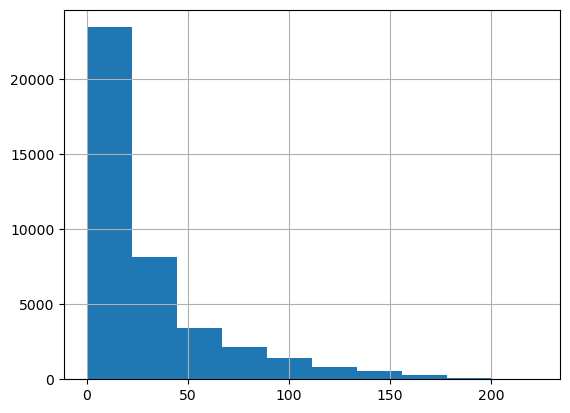

In [264]:
# word frequncy

df['text'].str.split().map(lambda x: len(x)).hist()

Max length:  1997 , Min length:  0 , Average Length:  196.87629886194952


<Axes: >

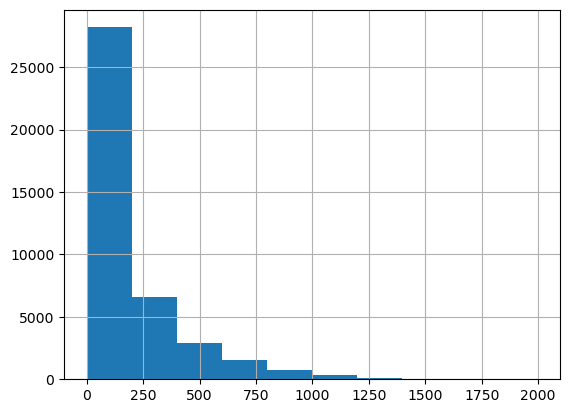

In [263]:
print('Max length: ' , df['text'].str.len().max() , ', Min length: ' , df['text'].str.len().min() , ', Average Length: ' ,  df['text'].str.len().mean())

df['text'].str.len().hist()

In [231]:
text= ' '.join(t for t in df['text'])
words_list= text.split()

word_freq= {}
for word in set(words_list):
    word_freq[word]= words_list.count(word)
#Creating dataframe of words
df_word= pd.DataFrame(word_freq.items(),columns=['word','count'])

df_word['word_len']= df_word['word'].map(lambda x: len(x))
# sorting values 
df_word=df_word.sort_values('count',ascending=False).reset_index(drop=True)
df_word

,word,count,word_len
0,love,18563,4
1,book,17283,4
2,great,16524,5
3,good,15116,4
4,one,14551,3
...,...,...,...
41959,acim,1,4
41960,puerile,1,7
41961,loaned,1,6
41962,dion,1,4


<Axes: >

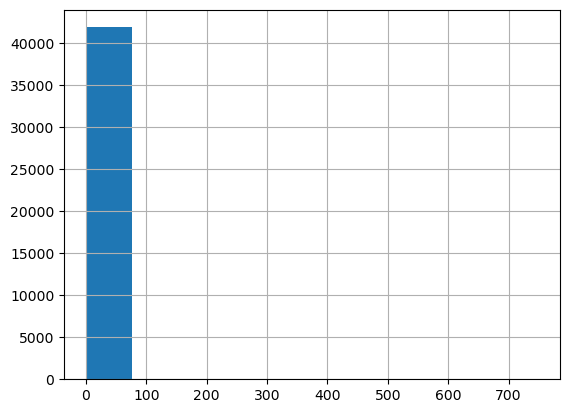

In [261]:
df_word['word_len'].hist()

In [ ]:
df_word[df_word['word_len']==max(df_word['word_len'])]

In [257]:
df[df['text'].str.contains('directorwriterdirectorscreenwriterwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriter')]

,category,rating,rating_binary,label,text
15486,Movies_and_TV,3.0,Negative,CG,clear mapes et al charge film experiment lot new idea idea basic idea great detective person solve case go sort metastory go movie man go crime spree there kind connection man thats film interest idea im sure directorwriterdirectorscreenwriterwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriter


In [277]:
df['text'] = df['text'].replace(to_replace=r'directorwriterdirectorscreenwriterwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriter', value='', regex=True)

In [278]:
df[df['text'].str.contains('directorwriterdirectorscreenwriterwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriterscreenwriter')]

,category,rating,rating_binary,label,text


<Axes: >

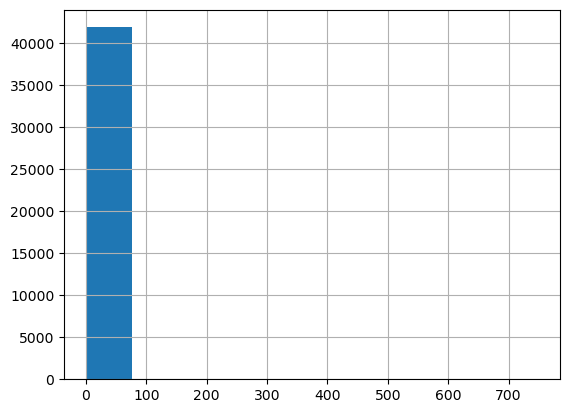

In [279]:
df_word['word_len'].hist()

In [282]:

df_word = df_word.sort_values(by = 'word_len') 
df_word

,word,count,word_len
1261,m,130,1
1996,l,69,1
1002,g,176,1
1285,w,127,1
1899,h,75,1
...,...,...,...
34738,hrefvictsingmmgwirelessportablemobilemouseopticalmicewithusbreceiveradjustabledpilevelsbuttonsfornotebookpclaptopcomputermacbookblackdpbwcparefcm_cr_arp_d_rvw_txtieutfvictsing,1,175
35300,hrefpeakeepdigitalalarmclockbatteryoperatedwithlargedisplaydualalarmsnoozetravelalarmclockandhomealarmclockoptionalweekdayalarmandsmartnightlightwhitedpblzzrefcm_cr_arp_d_rvw_txtieutfpeakeep,1,190
27595,hrefcurtainrodbracketssilversetofbracketsalsoknownascurtainrodholderbracketfordraperyrodwindowdraperyrodbracketsetfordraperiesadjustablecurtainrodbracketsdpbdtgglrefcm_cr_arp_d_rvw_txtieutfcurtain,1,196
40027,hrefbinsampthingsstackablestoragecontainerperfectforshopkinslittlestpetshoprainbowloombeadsdisneytsumtsumfiguresandartsampcraftsaccessorieswithadjustablecompartmentsdpbdxpirefcm_cr_arp_d_rvw_txtieutfbins,1,203


In [285]:
import seaborn as sns

above_15 = df_word[df_word["word_len"] > 14]
above_15

,word,count,word_len
21729,readrecommended,1,15
28453,nonoverwhelming,1,15
21694,eventsspillsdog,1,15
29846,storiesstraight,1,15
34675,yourselfplastic,1,15
...,...,...,...
34738,hrefvictsingmmgwirelessportablemobilemouseopticalmicewithusbreceiveradjustabledpilevelsbuttonsfornotebookpclaptopcomputermacbookblackdpbwcparefcm_cr_arp_d_rvw_txtieutfvictsing,1,175
35300,hrefpeakeepdigitalalarmclockbatteryoperatedwithlargedisplaydualalarmsnoozetravelalarmclockandhomealarmclockoptionalweekdayalarmandsmartnightlightwhitedpblzzrefcm_cr_arp_d_rvw_txtieutfpeakeep,1,190
27595,hrefcurtainrodbracketssilversetofbracketsalsoknownascurtainrodholderbracketfordraperyrodwindowdraperyrodbracketsetfordraperiesadjustablecurtainrodbracketsdpbdtgglrefcm_cr_arp_d_rvw_txtieutfcurtain,1,196
40027,hrefbinsampthingsstackablestoragecontainerperfectforshopkinslittlestpetshoprainbowloombeadsdisneytsumtsumfiguresandartsampcraftsaccessorieswithadjustablecompartmentsdpbdxpirefcm_cr_arp_d_rvw_txtieutfbins,1,203


In [ ]:
above_15.to_csv('/Users/junyuan/Desktop/above15.csv')

cleaning - expend contraction, document term matrix, split attached word, slang, spelling checking, n gram checking, sentiment (textblob), tokenization
